In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive


In [ ]:
# Importing the Libraries.
import keras
import os
from keras.models import Sequential
from keras.layers import Dense, Conv2D, MaxPool2D, Flatten, Dropout
from keras.preprocessing.image import ImageDataGenerator
import numpy as np
#import keras.backend as K
import tensorflow.keras.backend as K
import tensorflow.compat.v1 as tf
from os import listdir
from os.path import isfile, join
import numpy as np
import sys
import os
import shutil
import pandas as pd
from PIL import Image
import cv2
import keras
import glob
from PIL import Image
from keras.preprocessing.image import img_to_array
from sklearn.preprocessing import MultiLabelBinarizer
from keras import models, regularizers, layers, optimizers, losses, metrics
from keras.applications.resnet50 import ResNet50
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten, MaxPool2D
from keras.layers import Convolution2D, MaxPooling2D, ZeroPadding2D
from keras.layers import AveragePooling2D
from keras.models import load_model
from keras.layers.pooling import GlobalAveragePooling2D
from keras.layers.normalization import BatchNormalization
from keras.models import Model
from keras.optimizers import Adam
from keras.callbacks import ModelCheckpoint, EarlyStopping
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from PIL import ImageFile

In [ ]:
tf.enable_eager_execution()

In [ ]:
ImageFile.LOAD_TRUNCATED_IMAGES = True

In [ ]:
# Data Augmentation.
DataGenerator = ImageDataGenerator(horizontal_flip=True, vertical_flip=True, rescale=1./255)

In [ ]:
TestGenerator = ImageDataGenerator(rescale=1./255)

In [ ]:
Grey_TrainingData = DataGenerator.flow_from_directory('/content/drive/My Drive/curetDataSet/Train/', target_size=(224,224), batch_size=8, color_mode='grayscale')

Found 12733 images belonging to 60 classes.


In [ ]:
Grey_ValidData = TestGenerator.flow_from_directory('/content/drive/My Drive/curetDataSet/Valid/', target_size=(224,224), batch_size=8, color_mode='grayscale')

Found 693 images belonging to 60 classes.


In [ ]:
gpu_options = tf.GPUOptions(allow_growth=True)
session = tf.InteractiveSession(config=tf.ConfigProto(gpu_options=gpu_options))

/usr/local/lib/python3.6/dist-packages/tensorflow/python/client/session.py:1751: UserWarning: An interactive session is already active. This can cause out-of-memory errors in some cases. You must explicitly call `InteractiveSession.close()` to release resources held by the other session(s).
  warnings.warn('An interactive session is already active. This can '


In [ ]:
from keras.applications.inception_resnet_v2 import InceptionResNetV2

In [ ]:
conv_base = InceptionResNetV2(weights = 'imagenet', include_top = False, pooling = 'avg')

219062272/219055592 [==============================] - 6s 0us/step


In [ ]:
for layer in conv_base.layers[:765]:
  layer.trainable = False
for layer in conv_base.layers[765:]:
  layer.trainable = True
for layer in conv_base.layers:
  if isinstance(layer, BatchNormalization):
    layer.trainable = True

In [ ]:
for i, layer in enumerate(conv_base.layers):
  print(i, layer.name, layer.trainable)

0 input_1 False
1 conv2d False
2 batch_normalization True
3 activation False
4 conv2d_1 False
5 batch_normalization_1 True
6 activation_1 False
7 conv2d_2 False
8 batch_normalization_2 True
9 activation_2 False
10 max_pooling2d False
11 conv2d_3 False
12 batch_normalization_3 True
13 activation_3 False
14 conv2d_4 False
15 batch_normalization_4 True
16 activation_4 False
17 max_pooling2d_1 False
18 conv2d_8 False
19 batch_normalization_8 True
20 activation_8 False
21 conv2d_6 False
22 conv2d_9 False
23 batch_normalization_6 True
24 batch_normalization_9 True
25 activation_6 False
26 activation_9 False
27 average_pooling2d False
28 conv2d_5 False
29 conv2d_7 False
30 conv2d_10 False
31 conv2d_11 False
32 batch_normalization_5 True
33 batch_normalization_7 True
34 batch_normalization_10 True
35 batch_normalization_11 True
36 activation_5 False
37 activation_7 False
38 activation_10 False
39 activation_11 False
40 mixed_5b False
41 conv2d_15 False
42 batch_normalization_15 True
43 activat

In [ ]:
from keras.layers import Input

In [ ]:
input_tensor = Input(shape=(224,224,1))

In [ ]:
x = Conv2D(3,(3,3), padding='same')(input_tensor)

In [ ]:
x = conv_base(x)

In [ ]:
x = Dense(2048, activation='relu', kernel_regularizer=regularizers.l2(0.001))(x)
x = Dropout(0.5)(x)
out = Dense(60, activation='softmax')(x)

In [ ]:
model = Model(inputs = input_tensor, outputs = out)

In [ ]:
model.summary()

Model: "functional_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_4 (InputLayer)         [(None, 224, 224, 1)]     0         
_________________________________________________________________
conv2d_407 (Conv2D)          (None, 224, 224, 3)       30        
_________________________________________________________________
inception_resnet_v2 (Functio (None, 1536)              54336736  
_________________________________________________________________
dense_2 (Dense)              (None, 2048)              3147776   
_________________________________________________________________
dropout_1 (Dropout)          (None, 2048)              0         
_________________________________________________________________
dense_3 (Dense)              (None, 60)                122940    
Total params: 57,607,482
Trainable params: 8,130,234
Non-trainable params: 49,477,248
__________________________________

In [ ]:
model.compile(loss='categorical_crossentropy',
              optimizer=Adam(lr=0.001),
              metrics=['accuracy'])

In [ ]:
from keras.callbacks import ModelCheckpoint, EarlyStopping, ReduceLROnPlateau
checkpoint = ModelCheckpoint("/content/drive/My Drive/curetDataSet/Curnet_GreyScale_InceptionResnetV2.h5",
                             monitor="val_loss",
                             mode="min",
                             save_best_only = True,
                             verbose=1)

earlystop = EarlyStopping(monitor = 'val_loss', 
                          min_delta = 0, 
                          patience = 40,
                          verbose = 1,
                          restore_best_weights = True)

reduce_lr = ReduceLROnPlateau(monitor = 'val_loss',
                              factor = 0.2,
                              patience = 40,
                              verbose = 1,
                              min_delta = 0.00001)

callBacks = [earlystop, checkpoint, reduce_lr]

In [ ]:
hist = model.fit_generator(steps_per_epoch=1592,generator= Grey_TrainingData, validation_data= Grey_ValidData, validation_steps=87,epochs=5,callbacks=callBacks)

Epoch 1/5
1592/1592 [==============================] - ETA: 0s - loss: 2.3155 - accuracy: 0.5033
Epoch 00001: val_loss improved from inf to 10.19766, saving model to /content/drive/My Drive/curetDataSet/Curnet_GreyScale_InceptionResnetV2.h5
1592/1592 [==============================] - 344s 216ms/step - loss: 2.3155 - accuracy: 0.5033 - val_loss: 10.1977 - val_accuracy: 0.7835
Epoch 2/5
1592/1592 [==============================] - ETA: 0s - loss: 1.2068 - accuracy: 0.7412
Epoch 00002: val_loss improved from 10.19766 to 6.09687, saving model to /content/drive/My Drive/curetDataSet/Curnet_GreyScale_InceptionResnetV2.h5
1592/1592 [==============================] - 344s 216ms/step - loss: 1.2068 - accuracy: 0.7412 - val_loss: 6.0969 - val_accuracy: 0.8557
Epoch 3/5
1592/1592 [==============================] - ETA: 0s - loss: 0.9629 - accuracy: 0.8100
Epoch 00003: val_loss improved from 6.09687 to 3.77945, saving model to /content/drive/My Drive/curetDataSet/Curnet_GreyScale_InceptionResnetV

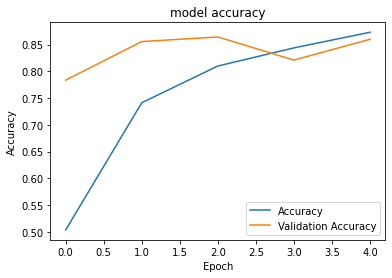

In [ ]:
import matplotlib.pyplot as plt
plt.plot(hist.history["accuracy"])
plt.plot(hist.history['val_accuracy'])
plt.title("model accuracy")
plt.ylabel("Accuracy")
plt.xlabel("Epoch")
plt.legend(["Accuracy","Validation Accuracy"])
plt.show()

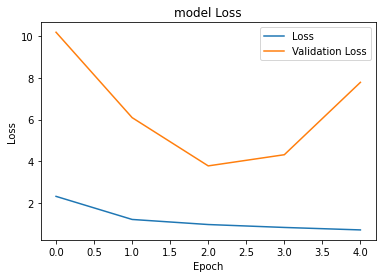

In [ ]:
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.title("model Loss")
plt.ylabel("Loss")
plt.xlabel("Epoch")
plt.legend(["Loss","Validation Loss"])
plt.show()

In [ ]:
GreyTestData = TestGenerator.flow_from_directory('/content/drive/My Drive/curetDataSet/Test/', target_size=(224,224), batch_size = 8, shuffle = False, color_mode='grayscale')

Found 750 images belonging to 60 classes.


In [ ]:
model.load_weights('/content/drive/My Drive/curetDataSet/Curnet_GreyScale_InceptionResnetV2.h5')

In [ ]:
Grey_predict = model.predict(GreyTestData)

In [ ]:
Grey_predict_classes = np.argmax(Grey_predict, axis=1)

In [ ]:
Grey_predict_classes

array([10,  0,  0,  1,  0,  0,  0,  0,  0,  5,  4,  4,  1,  1,  1,  1,  1,
       10,  1, 10,  1,  1,  1,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,
        3,  5,  3,  5, 15,  5,  3,  5,  3,  3, 15, 10,  4,  4,  4,  4,  4,
        4,  1,  4,  4,  4,  5,  5,  5,  5,  5,  5,  5,  5,  5,  5,  5,  5,
       44,  6,  6,  6,  6, 52,  6,  6,  6, 10, 10, 10,  7,  7,  7,  7,  7,
        7,  7,  7,  7,  8,  8, 10,  8,  8,  8,  8,  8,  8,  8,  8,  9, 10,
        9,  9,  9,  9,  9,  9,  9,  9,  9, 10, 10, 10, 10, 10, 10, 10, 10,
       10, 10, 10, 11, 11, 11, 11, 11, 11, 10, 11, 11, 11,  5, 12, 12, 12,
       12, 12, 12, 45, 12, 12, 12, 12, 10, 42, 13, 13, 13, 13, 13, 13, 13,
       13, 10, 14, 14, 10, 10, 14, 10, 14, 14, 14, 14, 14, 15, 15, 15, 15,
       15, 15, 15, 15, 15,  5, 15, 16, 16, 16, 16, 16, 16,  5, 10, 16, 16,
        5, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 18, 18, 18, 18, 18,
       18, 18, 18, 18, 18, 18, 19, 19, 19, 19, 19,  1, 19, 19, 19, 19, 19,
       20, 20, 20, 20, 20

In [ ]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import cohen_kappa_score
from sklearn.metrics import roc_auc_score

In [ ]:
Grey_accuracy = accuracy_score(GreyTestData.classes, Grey_predict_classes)
print("Grey Accuracy: ", Grey_accuracy)

Grey Accuracy:  0.8413333333333334


In [ ]:
Grey_precision = precision_score(GreyTestData.classes, Grey_predict_classes,average="weighted")
print("Grey Precision: ", Grey_precision)

Grey Precision:  0.9308848810348809


In [ ]:
Grey_recall = recall_score(GreyTestData.classes, Grey_predict_classes, average="weighted")
print("Grey Recall:", Grey_recall)

Grey Recall: 0.8413333333333334


In [ ]:
Grey_f1_score = f1_score(GreyTestData.classes, Grey_predict_classes, average="weighted")
print("F1 score for Grey: ", Grey_f1_score)

F1 score for Grey:  0.8653887362025671


In [ ]:
Colour_TrainingData =  DataGenerator.flow_from_directory('/content/drive/My Drive/curetDataSet/Train/', target_size=(224,224), batch_size=8)

Found 12733 images belonging to 60 classes.


In [ ]:
Colour_ValidData =  DataGenerator.flow_from_directory('/content/drive/My Drive/curetDataSet/Valid/', target_size=(224,224), batch_size=8)

Found 693 images belonging to 60 classes.


In [ ]:
conv_base_colour = InceptionResNetV2(weights = 'imagenet', include_top = False, pooling = 'avg')

In [ ]:
for layer in conv_base.layers[:765]:
  layer.trainable = False
for layer in conv_base.layers[765:]:
  layer.trainable = True
for layer in conv_base.layers:
  if isinstance(layer, BatchNormalization):
    layer.trainable = True

In [ ]:
for i, layer in enumerate(conv_base.layers):
  print(i, layer.name, layer.trainable)

0 input_3 False
1 conv2d_204 False
2 batch_normalization_203 True
3 activation_203 False
4 conv2d_205 False
5 batch_normalization_204 True
6 activation_204 False
7 conv2d_206 False
8 batch_normalization_205 True
9 activation_205 False
10 max_pooling2d_4 False
11 conv2d_207 False
12 batch_normalization_206 True
13 activation_206 False
14 conv2d_208 False
15 batch_normalization_207 True
16 activation_207 False
17 max_pooling2d_5 False
18 conv2d_212 False
19 batch_normalization_211 True
20 activation_211 False
21 conv2d_210 False
22 conv2d_213 False
23 batch_normalization_209 True
24 batch_normalization_212 True
25 activation_209 False
26 activation_212 False
27 average_pooling2d_1 False
28 conv2d_209 False
29 conv2d_211 False
30 conv2d_214 False
31 conv2d_215 False
32 batch_normalization_208 True
33 batch_normalization_210 True
34 batch_normalization_213 True
35 batch_normalization_214 True
36 activation_208 False
37 activation_210 False
38 activation_213 False
39 activation_214 False
40

In [ ]:
from keras.layers import Input

In [ ]:
input_tensor = Input(shape=(224,224,3))

In [ ]:
x = conv_base_colour(input_tensor)

In [ ]:
x = Dense(2048, activation='relu', kernel_regularizer=regularizers.l2(0.001))(x)
x = Dropout(0.5)(x)
out = Dense(60, activation='softmax')(x)

In [ ]:
model_colour = Model(inputs = input_tensor, outputs = out)

In [ ]:
model_colour.summary()

Model: "functional_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_6 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
inception_resnet_v2 (Functio (None, 1536)              54336736  
_________________________________________________________________
dense_4 (Dense)              (None, 2048)              3147776   
_________________________________________________________________
dropout_2 (Dropout)          (None, 2048)              0         
_________________________________________________________________
dense_5 (Dense)              (None, 60)                122940    
Total params: 57,607,452
Trainable params: 57,546,908
Non-trainable params: 60,544
_________________________________________________________________


In [ ]:
model_colour.compile(loss='categorical_crossentropy',
              optimizer=Adam(lr=0.001),
              metrics=['accuracy'])

In [ ]:
from keras.callbacks import ModelCheckpoint, EarlyStopping, ReduceLROnPlateau
checkpoint = ModelCheckpoint("/content/drive/My Drive/curetDataSet/Curnet_InceptionResnet_V2_Colour.h5",
                             monitor="val_loss",
                             mode="min",
                             save_best_only = True,
                             verbose=1)

earlystop = EarlyStopping(monitor = 'val_loss', 
                          min_delta = 0, 
                          patience = 40,
                          verbose = 1,
                          restore_best_weights = True)

reduce_lr = ReduceLROnPlateau(monitor = 'val_loss',
                              factor = 0.2,
                              patience = 40,
                              verbose = 1,
                              min_delta = 0.00001)

callBacks = [earlystop, checkpoint, reduce_lr]

In [ ]:
hist = model_colour.fit_generator(steps_per_epoch=1592,generator= Colour_TrainingData, validation_data= Colour_ValidData, validation_steps=87,epochs=35,callbacks=callBacks)

Epoch 1/35
1592/1592 [==============================] - ETA: 0s - loss: 3.1308 - accuracy: 0.2452
Epoch 00001: val_loss improved from inf to 2.07020, saving model to /content/drive/My Drive/curetDataSet/Curnet_InceptionResnet_V2_Colour.h5
1592/1592 [==============================] - 352s 221ms/step - loss: 3.1308 - accuracy: 0.2452 - val_loss: 2.0702 - val_accuracy: 0.4560
Epoch 2/35
1592/1592 [==============================] - ETA: 0s - loss: 1.5008 - accuracy: 0.5964
Epoch 00002: val_loss improved from 2.07020 to 1.00843, saving model to /content/drive/My Drive/curetDataSet/Curnet_InceptionResnet_V2_Colour.h5
1592/1592 [==============================] - 350s 220ms/step - loss: 1.5008 - accuracy: 0.5964 - val_loss: 1.0084 - val_accuracy: 0.7403
Epoch 3/35
1592/1592 [==============================] - ETA: 0s - loss: 1.0296 - accuracy: 0.7486
Epoch 00003: val_loss improved from 1.00843 to 0.92410, saving model to /content/drive/My Drive/curetDataSet/Curnet_InceptionResnet_V2_Colour.h5
1

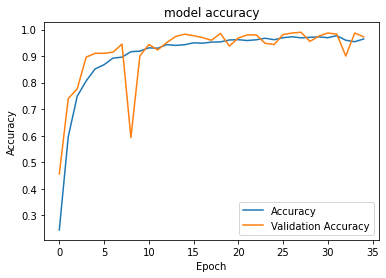

In [ ]:
import matplotlib.pyplot as plt
plt.plot(hist.history["accuracy"])
plt.plot(hist.history['val_accuracy'])
plt.title("model accuracy")
plt.ylabel("Accuracy")
plt.xlabel("Epoch")
plt.legend(["Accuracy","Validation Accuracy"])
plt.show()

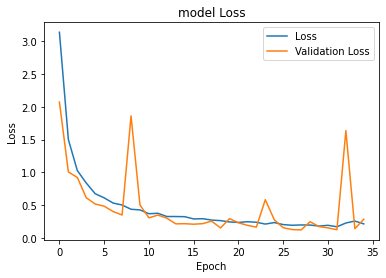

In [ ]:
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.title("model Loss")
plt.ylabel("Loss")
plt.xlabel("Epoch")
plt.legend(["Loss","Validation Loss"])
plt.show()

In [ ]:
Colour_TestData = TestGenerator.flow_from_directory('/content/drive/My Drive/curetDataSet/Test/', target_size=(224,224), batch_size = 8, shuffle = False)

Found 750 images belonging to 60 classes.


In [ ]:
model_colour.load_weights('/content/drive/My Drive/curetDataSet/Curnet_InceptionResnet_V2_Colour.h5')

In [ ]:
Colour_predict = model_colour.predict(Colour_TestData)

In [ ]:
Colour_predict_classes = np.argmax(Colour_predict, axis=1)

In [ ]:
Colour_predict_classes

array([ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0, 40,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,
        3,  3,  3,  3,  1,  3,  3,  3,  3,  3,  3,  4,  4,  4,  4,  4,  4,
        4,  4,  4,  4,  4,  5,  5,  5,  5,  5,  5, 53,  5,  5,  5,  5,  6,
        6,  6,  6,  6,  6,  6,  6,  6,  6,  6,  7,  7,  7,  7,  7,  7,  7,
        7,  7,  7, 45,  8,  8,  8,  8,  8,  8,  8,  8,  8,  8,  8,  9,  9,
        9,  9,  9,  9,  9,  9,  9,  9,  9, 10, 10, 10, 10, 10, 10, 10, 10,
       10, 10, 10, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 12, 12, 12,
       12, 12, 12, 12, 12, 12, 12, 12, 13, 13, 13, 13, 13, 13, 13, 13, 13,
       13, 13, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 15, 15, 15, 15,
       15, 15, 15, 15, 15, 15, 15, 16, 16, 16, 16, 16, 16, 16, 16, 40, 16,
       16, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 18, 18, 18, 18, 18,
       18, 18, 18, 18, 18, 18, 19, 19, 19, 19, 19, 53, 19, 19, 19, 19, 19,
       20, 20, 20, 20, 20

In [ ]:
Colour_accuracy = accuracy_score(Colour_TestData.classes, Colour_predict_classes)
print("Colour Accuracy: ", Colour_accuracy)

Colour Accuracy:  0.964


In [ ]:
Colour_precision = precision_score(Colour_TestData.classes, Colour_predict_classes,average="weighted")
print("Colour Precision: ", Colour_precision)

Colour Precision:  0.969213865602996


In [ ]:
Colour_recall = recall_score(Colour_TestData.classes, Colour_predict_classes, average="weighted")
print("Colour Recall:", Colour_recall)

Colour Recall: 0.964


In [ ]:
Colour_f1_score = f1_score(Colour_TestData.classes, Colour_predict_classes, average="weighted")
print("F1 score for colour: ", Colour_f1_score)

F1 score for colour:  0.9646090311631645


In [ ]:
Final = 0.6* Colour_predict + 0.4* Grey_predict

In [ ]:
Final_Predict_classes = np.argmax(Final, axis=1)

In [ ]:
Final_Predict_classes

array([ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  4,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,
        3,  3,  3,  3,  1,  3,  3,  3,  3,  3,  3,  4,  4,  4,  4,  4,  4,
        4,  4,  4,  4,  4,  5,  5,  5,  5,  5,  5,  5,  5,  5,  5,  5,  6,
        6,  6,  6,  6,  6,  6,  6,  6,  6,  6,  7,  7,  7,  7,  7,  7,  7,
        7,  7,  7,  7,  8,  8,  8,  8,  8,  8,  8,  8,  8,  8,  8,  9,  9,
        9,  9,  9,  9,  9,  9,  9,  9,  9, 10, 10, 10, 10, 10, 10, 10, 10,
       10, 10, 10, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 12, 12, 12,
       12, 12, 12, 12, 12, 12, 12, 12, 13, 13, 13, 13, 13, 13, 13, 13, 13,
       13, 13, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 15, 15, 15, 15,
       15, 15, 15, 15, 15, 15, 15, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16,
       16, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 18, 18, 18, 18, 18,
       18, 18, 18, 18, 18, 18, 19, 19, 19, 19, 19, 53, 19, 19, 19, 19, 19,
       20, 20, 20, 20, 20

In [ ]:
Final_accuracy = accuracy_score(Colour_TestData.classes, Final_Predict_classes)
print("Colour Accuracy: ", Final_accuracy)

Colour Accuracy:  0.9706666666666667


In [ ]:
Final_precision = precision_score(Colour_TestData.classes, Final_Predict_classes,average="weighted")
print("Colour Precision: ", Final_precision)

Colour Precision:  0.973912761228093


In [ ]:
Final_recall = recall_score(Colour_TestData.classes, Final_Predict_classes, average="weighted")
print("Colour Recall:", Final_recall)

Colour Recall: 0.9706666666666667


In [ ]:
Final_f1_score = f1_score(Colour_TestData.classes, Final_Predict_classes, average="weighted")
print("F1 score for colour: ", Final_f1_score)

F1 score for colour:  0.970825168244061


In [ ]:
Second_Final = 0.5* Colour_predict + 0.5 * Grey_predict

In [ ]:
Second_predict_classes = np.argmax(Second_Final, axis=1)

In [ ]:
Second_predict_classes

array([10,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  4,  1,  1,  1,  1,  1,
       10,  1, 10,  1,  1,  1,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,
        3,  3,  3,  3,  1,  3,  3,  3,  3,  3,  3, 10,  4,  4,  4,  4,  4,
        4,  4,  4,  4,  4,  5,  5,  5,  5,  5,  5,  5,  5,  5,  5,  5,  6,
        6,  6,  6,  6,  6,  6,  6,  6,  6, 10, 10, 10,  7,  7,  7,  7,  7,
        7,  7,  7,  7,  8,  8,  8,  8,  8,  8,  8,  8,  8,  8,  8,  9,  9,
        9,  9,  9,  9,  9,  9,  9,  9,  9, 10, 10, 10, 10, 10, 10, 10, 10,
       10, 10, 10, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 12, 12, 12,
       12, 12, 12, 12, 12, 12, 12, 12, 10, 13, 13, 13, 13, 13, 13, 13, 13,
       13, 10, 14, 14, 14, 10, 14, 14, 14, 14, 14, 14, 14, 15, 15, 15, 15,
       15, 15, 15, 15, 15, 15, 15, 16, 16, 16, 16, 16, 16, 16, 10, 16, 16,
       16, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 18, 18, 18, 18, 18,
       18, 18, 18, 18, 18, 18, 19, 19, 19, 19, 19, 53, 19, 19, 19, 19, 19,
       20, 20, 20, 20, 20

In [ ]:
Second_Final_accuracy = accuracy_score(Colour_TestData.classes, Second_predict_classes)
Second_Final_accuracy

0.92

In [ ]:
Final = 0.8* Colour_predict + 0.2* Grey_predict

In [ ]:
Final_Predict_classes = np.argmax(Final, axis=1)

In [ ]:
Final_accuracy = accuracy_score(Colour_TestData.classes, Final_Predict_classes)
print("Colour Accuracy: ", Final_accuracy)